In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("cleanp2.csv")

In [4]:
titanic.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [5]:
### gives info about each column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1300 non-null   float64
 6   sibsp       1308 non-null   float64
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1309 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   1309 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 153.5+ KB


In [6]:
## picking cols we want to visualize
cols = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch','embarked','home.dest','fare']
t2 = titanic[cols]

In [7]:
t2

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0,S,USA,2113.375
1,1,1,"Allison, Master. Hudson Trevor",male,92.0,1.0,2,S,CANADA,151.000
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2,S,CANADA,151.000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2,S,CANADA,151.000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2,S,CANADA,151.000
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,16.0,1.0,0,C,UK,144.000
1305,3,0,"Zabour, Miss. Thamine",female,19.0,1.0,0,C,UK,144.000
1306,3,0,"Zakarian, Mr. Mapriededer",male,22.0,0.0,0,C,TURKEY,7.000
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0.0,0,C,TURKEY,7.000


## Basic scatter plot

In [8]:
x= list(range(10,20,3))
y = list(range(20,30,3))

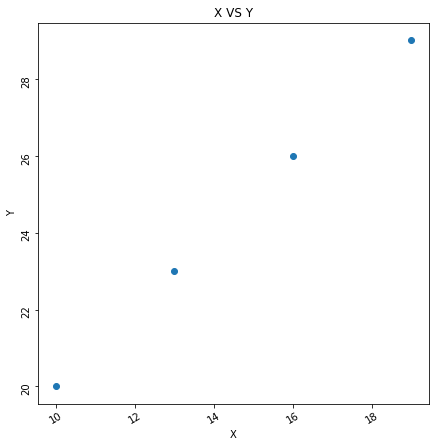

In [9]:
# scatter plot
plt.figure(figsize =(7,7))
plt.scatter(x,y)
plt.title("X VS Y",loc="center")
plt.ylabel("Y")
plt.xlabel("X")
plt.xticks(rotation = 30.5)
plt.yticks(rotation = 90)
plt.show()

## plotting the scatter plot on our data


In [10]:
### cleaning (rough cleaning)
med = t2["fare"].median()
mean_a = t2["age"].mean()
t2['fare'].fillna(med,inplace=True)
t2["age"].fillna(mean_a,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
t2.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,2.294882,0.381971,30.093077,0.499235,0.385027,146.400974
std,0.837836,0.486055,14.239480,1.041965,0.865560,407.393240
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,11.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,29.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,86.000000
max,3.000000,1.000000,92.000000,8.000000,9.000000,5123.292000


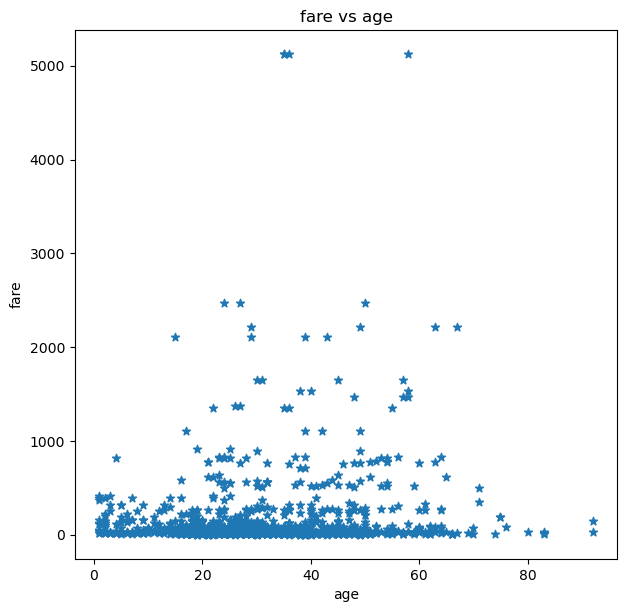

In [12]:
### fare and age relationship

plt.figure(figsize=(7,7),dpi = 100)
plt.scatter(t2["age"],t2["fare"],marker="*")
plt.ylabel("fare")
plt.xlabel("age")
plt.title("fare vs age")
plt.show()

In [13]:
#### new DF with regions and count of regions
destination =pd.DataFrame(t2["home.dest"].value_counts()).reset_index()

In [14]:
### reset index
destination.rename(columns ={"index":"d/o","home.dest":"n_p"},inplace=True)

In [15]:
## making capilized values small
destination["d/o2"]= [i.lower() for i in destination["d/o"]]

In [16]:
### making capilized values small
locations = []
for name in destination["d/o"]:
    locations.append(name.lower())
destination["d/o3"]=locations

In [17]:
destination.head()

,d/o,n_p,d/o2,d/o3
0,UK,329,uk,uk
1,USA,319,usa,usa
2,IRELAND,117,ireland,ireland
3,SWEDEN,103,sweden,sweden
4,FINLAND,54,finland,finland


## Bar chart plotting

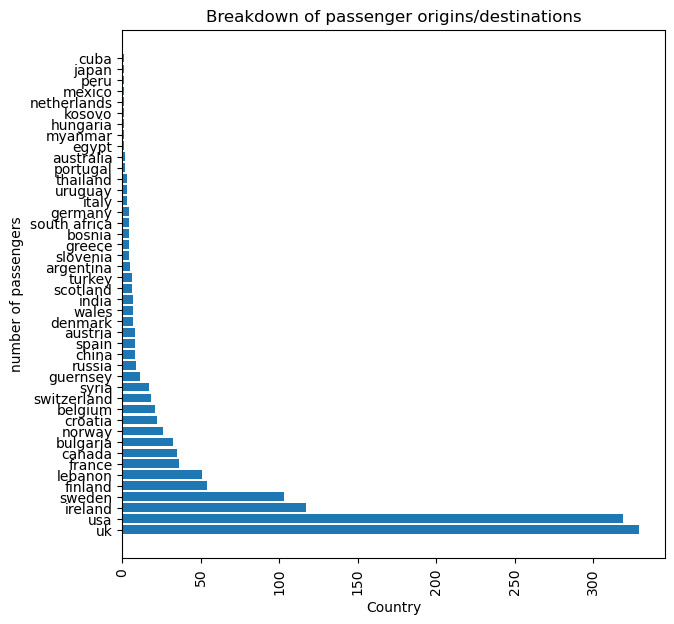

In [19]:
## regions and n of pple from diff regions
plt.figure(figsize=(7,7),dpi = 100)
plt.barh(destination["d/o2"],destination["n_p"])
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("number of passengers")
plt.title("Breakdown of passenger origins/destinations")
plt.show()